In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math

# <center>Homework #4</center>

![p1](./hw4_1_2_.png)

1.<br>
The noise will increase. The deterministic noise comes for the reason that the target function is two complicated and the hypothesis we make has difference from it, the simpler they are, the bigger the difference is. If we use a subset of the original H, then we have high probability that we have simpler hypothesis, that increases the deterministic noise 

2.<br>
$H(10, 0, 3) = \{h|h(x) = \sum\limits_{q = 0}^{2}w_qL_q(x)\} = H_2$, $H(10, 0, 4) = \{h|h(x) = \sum\limits_{q = 0}^{3}w_qL_q(x)\} = H_3$  
So $H(10, 0, 3)\bigcap H(10,0,4) =  H_2$

![p3](./hw4_3_4.png)

3.<br>
$\nabla E_{aug}(w) = \nabla E_{in}(w) + 2\frac{\lambda}{N}w$  
$w(t+1) = w(t) - \eta\nabla E_{aug}(w(t)) = (1 - 2\frac{\eta\lambda}{N})w(t) - \eta\nabla E(w(t))$  
So $\alpha = (1 - 2\frac{\eta\lambda}{N})$ and $\beta = -\eta$

4.<br>
The original problem can be viewed as an optimization problem for $E_{in}$:  
$$E_{in} = \frac{1}{N}(Zw - y)^T(Zw - y), s.t. w^Tw <= C$$ 
the same as solving the equation:  
$$-\nabla E_{in}(w_{reg}) + \frac{2\lambda}{N}w_{reg} = 0$$
if decrease C (the same as increas $\lambda$) $w_{lin}^Tw_{lin} <= C$, then $||w_{reg}|| = ||w_{lin}||$  
else, $||w_{reg}|| = \sqrt C$, it decreases  
So $||w_{reg}(\lambda)||$ is a non increasing function

![p5](./hw4_5.png)

5.<br>
For $h_0$, $E_{lvoo}(h_0) = \frac{1}{3}[1^2 + 0.5^2 + 0.5^2]$  
For $h_1$, $E_{lvoo}(h_1) = \frac{1}{3}[(\frac{-2}{\rho - 1})^2 + (\frac{2}{\rho + 1})^2 + 1^2]$  
Let $E_{lvoo}(h_0) = E_{lvoo}(h_1)$, we get $\rho = \sqrt{9 + 4\sqrt6}$

![p_6](./hw4_6_7.png)

6.<br>
$2^5 + 2^4 + 2^3 + 2^2 = 60$

7.<br>
The total number of letters sent is:  
$$2^5 + 2^4 + 2^3 + 2^2 + 2^1 + 2^0 = 63$$
The total cost of sending emails is:
$$63 \times 10 = 630$$
Then $1000 - 630 = 370$ NTD can be made

![p8](./hw4_8_10.png)

8.<br>
M = 1

9.<br>
$P(|E_{out} - E_{in}|>0.01) <= 2 * 1 * exp(-2 * (0.01)^2 * 10000) \approx 0.2706 $

10.<br>
The data used to test g is not the same distribution to sent to a(in the real world), the data are actually sifted by a, so to improve a, we should first use a to get customers then use g to kick out unproper cumtomers

![p11](./hw4_11_12.png)

11.<br>
Let $X = \left [ \begin {matrix} -x_1^T-  \\ \vdots \\   -{x_n}^T-\end{matrix}\right ]$, let $y = \left [ \begin {matrix} y_1  \\ \vdots \\ y_n \end{matrix}\right ]$, let $\tilde X = \left [ \begin {matrix}  -\tilde{x_1}^T- \\ \vdots \\  -\tilde{x_K}^T-\end{matrix}\right ]$, let $\tilde y = \left [ \begin {matrix}  \tilde{y_1} \\ \vdots \\ \tilde {y_K}\end{matrix}\right ]$    

$E_{in} = \frac{1}{N+K}[(Xw - y)^T(Xw - y) + (\tilde Xw - \tilde y)^T(\tilde Xw - \tilde y)] = \frac{1}{N+K} (w^TX^TXw - 2w^TX^Ty + y^Ty + w^T\tilde X^T \tilde Xw - 2w^T\tilde X^T\tilde y + \tilde y^T\tilde y)$  
Let $\nabla E_{in} = \frac{2}{N + K}[(X^TX + \tilde X^T \tilde X)w -(X^Ty + \tilde X^T \tilde y)] = 0$  
we get:  
$w = (X^TX + \tilde X^T \tilde X)^{-1}(X^Ty + \tilde X^T \tilde y)$


12.<br>
For $w_{reg}$, $w_{reg}= (X^TX + \lambda I)^{-1}X^Ty$, comparet with problem 11, we get:  
$\tilde X = \sqrt \lambda I$, $\tilde y = 0$

![p_13](./hw4_13_15.png)

In [55]:
## load data
train_data = np.loadtxt('hw4_train.txt')
test_data = np.loadtxt('hw4_test.txt')

def generate_data(data):
    X = []
    Y = []
    for i in range(len(data)):
        X.append(np.append([1], data[i][:-1]))
        Y.append(data[i][-1])
    return np.array(X), np.array(Y)
X_train, Y_train = generate_data(train_data)
X_test, Y_test = generate_data(test_data)

def ridge_regression(lam, X_train, Y_train):
    A = np.matmul(X_train.T, X_train)
    I = np.eye(len(A))
    w_reg = np.matmul(np.matmul(np.linalg.inv((A + lam * I)), X_train.T), Y_train)
    return w_reg

def compute_error(w, X, Y):
    predict = np.matmul(X, w)
    E = 0
    for i in range(len(predict)):
        if predict[i] * Y[i] <= 0:
            E += 1
    return E / len(Y)

13.  

In [31]:
lam = 11.26
w = ridge_regression(lam, X_train, Y_train)
Ein = compute_error(w, X_train, Y_train)
Eout = compute_error(w, X_test, Y_test)
print("Ein =", Ein, "Eout =", Eout)

Ein = 0.055 Eout = 0.052


14.  

The minium Ein = 0.015 with lambda = 1e-08 Eout =  0.02


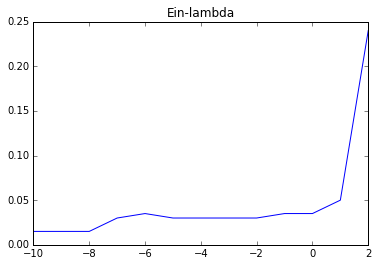

In [44]:
lam_array = [2 - i for i in range(13)]
Ein_array = []
Eout_array = []

w_array = [ridge_regression(10**l, X_train, Y_train) for l in lam_array]
min_ein = 1
ein_index = 0
min_eout = 1
eout_index = 0
for w_reg in w_array:
    Ein_array.append(compute_error(w_reg, X_train, Y_train))
    Eout_array.append(compute_error(w_reg, X_test, Y_test))
    if min_ein > Ein_array[-1]:
        ein_index = len(Ein_array) - 1
        min_ein = Ein_array[-1]
    if min_eout > Eout_array[-1]:
        eout_index = len(Eout_array) - 1
        min_eout = Eout_array[-1]
print("The minium Ein =", min_ein, "with lambda =", 10 ** lam_array[ein_index], "Eout = ", Eout_array[ein_index])
plt.plot(lam_array, Ein_array)
plt.title("Ein-lambda")
plt.show()


The minium Eout = 0.015 with lambda = 1e-07 Ein = 0.03


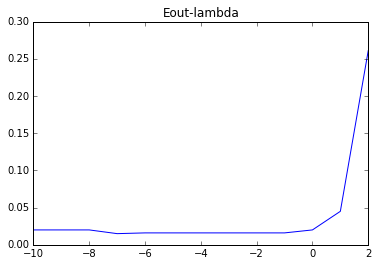

In [45]:
print("The minium Eout =", min_eout, "with lambda =", 10 ** lam_array[eout_index], "Ein =", Ein_array[eout_index])
plt.plot(lam_array, Eout_array)
plt.title("Eout-lambda")
plt.show()

![p16](./hw4_16_20_.png)

16.

The minium Ein = 0.0 with lambda = 1e-08 Eval =  0.05 Eout =  0.025


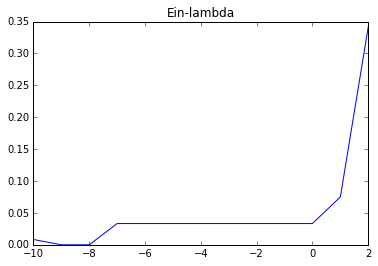

In [56]:
X_val = X_train[120:]
X_train_ = X_train[:120]
Y_val = Y_train[120:]
Y_train_ = Y_train[:120]

lam_array = [2 - i for i in range(13)]
Ein_array = []
Eout_array = []
Eval_array = []

w_array = [ridge_regression(10**l, X_train_, Y_train_) for l in lam_array]

min_ein = 1
ein_index = 0
min_eval = 1
eval_index = 0
min_eout = 1
eout_index = 0


for w_reg in w_array:
    Ein_array.append(compute_error(w_reg, X_train_, Y_train_))
    Eout_array.append(compute_error(w_reg, X_test, Y_test))
    Eval_array.append(compute_error(w_reg, X_val, Y_val))
    if min_ein > Ein_array[-1]:
        ein_index = len(Ein_array) - 1
        min_ein = Ein_array[-1]
    if min_eval > Eval_array[-1]:
        eval_index = len(Eval_array) - 1
        min_eval = Eval_array[-1]
    if min_eout > Eout_array[-1]:
        eout_index = len(Eout_array) - 1
        min_eout = Eout_array[-1]
print("The minium Ein =", min_ein, "with lambda =", 10 ** lam_array[ein_index], "Eval = ", Eval_array[ein_index], "Eout = ", Eout_array[ein_index])
plt.plot(lam_array, Ein_array)
plt.title("Ein-lambda")
plt.show()

17.

The minium Eval = 0.0375 with lambda = 1 Ein =  0.03333333333333333 Eout =  0.025


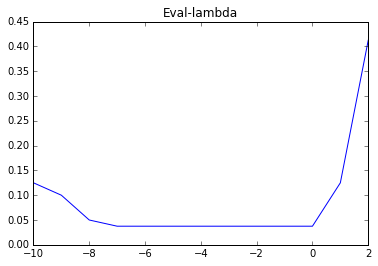

In [54]:
print("The minium Eval =", min_eval, "with lambda =", 10 ** lam_array[eval_index], "Ein = ", Ein_array[eval_index], "Eout = ", Eout_array[ein_index])
plt.plot(lam_array, Eval_array)
plt.title("Eval-lambda")
plt.show()

18.

In [57]:
best_lam = 10**(-8)
best_w_reg = ridge_regression(best_lam, X_train, Y_train)
Ein = compute_error(best_w_reg, X_train, Y_train)
Eout = compute_error(best_w_reg, X_test, Y_test)
print("Ein =", Ein, "Eout =", Eout)

Ein = 0.015 Eout = 0.02


19.

The minium Ecv = 0.03 with lambda = 1e-08


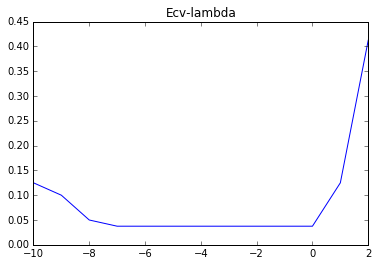

In [76]:

lam_array = [2 - i for i in range(13)]
Ein_array = []
Eval_fold_array = []
Ecv_array = []
Eout_array = []
w_fold_array = [[ridge_regression(10**l, np.array(X_train.tolist()[:i] + X_train.tolist()[i + 40:]), np.array(Y_train.tolist()[:i] + Y_train.tolist()[i + 40:])) \
            for i in [0, 40, 80, 120, 160]] \
            for l in lam_array]

ecv_min = 1
ecv_index = 0
for j in range(len(lam_array)):
    Eval_fold_array.append([])
    for i in range(5):
        Eval_fold_array[-1].append(compute_error(w_fold_array[j][i], X_train[40*i : 40*(i+1)], Y_train[40*i : 40*(i+1)]))
    Ecv_array.append(sum(Eval_fold_array[-1]) / 5)
    if ecv_min > Ecv_array[-1]:
        ecv_min = Ecv_array[-1]
        ecv_index = j
print("The minium Ecv =", ecv_min, "with lambda =", 10 ** lam_array[ecv_index])
plt.plot(lam_array, Eval_array)
plt.title("Ecv-lambda")
plt.show()

20.

In [77]:
lam = 10 ** (-8)
best_w_reg = ridge_regression(lam, X_train, Y_train)
Ein = compute_error(best_w_reg, X_train, Y_train)
Eout = compute_error(best_w_reg, X_test, Y_test)
print("Ein =", Ein, "Eout =", Eout)

Ein = 0.015 Eout = 0.02


![p_21](./hw4_21_22.png)

21.<br>
For $w_{reg}$, $w_{reg}= (X^TX + \lambda \Gamma ^T\Gamma)^{-1}X^Ty$, comparet with problem 11, we get:  
$\tilde X = \sqrt \lambda \Gamma$, $\tilde y = 0$

22.<br>
$reg = ||w - w_{hint}||^2 = (w - w_{hint})^T(w-w_{hint})$  
$\nabla reg = ||w - w_{hint}||^2 = 2(w -w_{hint})$
$\nabla E_{aug} = \frac{2}{N}[(X^TX + \lambda I) - (X^Ty + w_{hint})]$, let $\nabla E_{aug} = 0$, we get:  
$w_{reg} = (X^TX + \lambda I)^{-1}(X^Ty + w_{hint})$, compare with problem 11, we get:  
$\tilde X = \sqrt \lambda I$, $\tilde y = \large \frac{w_{hint}}{\sqrt \lambda}$